Example 2: Making a GTC/triangle plot with Planck and WMAP data!
================================================================

Download the data
----------------

The full set of chains from the Planck 2015 release is available at http://pla.esac.esa.int/pla/#cosmology. You will want to download `COM_CosmoParams_fullGrid_R2.00.tar.gz`. Careful, that's a huge file to download (3.6 GB)!

Extract everything into a directory, cd into that directory, and run this notebook.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display

import numpy as np
from matplotlib import pyplot as plt
import pygtc

Read in and format the data
--------------------------

In [2]:
WMAP, Planck = [],[]
for i in range(1,5):
    WMAP.append(np.loadtxt('./base/WMAP/base_WMAP_'+str(i)+'.txt'))
    Planck.append(np.loadtxt('./base/plikHM_TT_lowTEB/base_plikHM_TT_lowTEB_'+str(i)+'.txt'))

In [3]:
# Copy all four chains into a single array
WMAPall = np.concatenate((WMAP[0],WMAP[1],WMAP[2],WMAP[3]))
Planckall = np.concatenate((Planck[0],Planck[1],Planck[2],Planck[3]))

Select the parameters and make labels
-----------------------------------

In the chain directories, there are ``.paramnames`` files that allow you
to find the parameters you are interested in.

In [4]:
WMAPplot = WMAPall[:,[2,3,4,5,6,7,9,15]]
Planckplot = Planckall[:,[2,3,4,5,6,7,23,29]]

In [5]:
# Labels, pyGTC supports Tex enclosed in $..$
params = ('$\Omega_\mathrm{b}h^2$',
          '$\Omega_\mathrm{c}h^2$',
          '$100\\theta_\mathrm{MC}$',
          '$\\tau$',
          '$\ln(10^{10}A_s)$',
          '$n_s$','$H_0$',
          '$\\sigma_8$')

chainLabels = ('$Planck$ (TT+lowTEB)','WMAP')

Make the GTC!
------------

Produce the plot and save it as `Planck-vs-WMAP.pdf`.

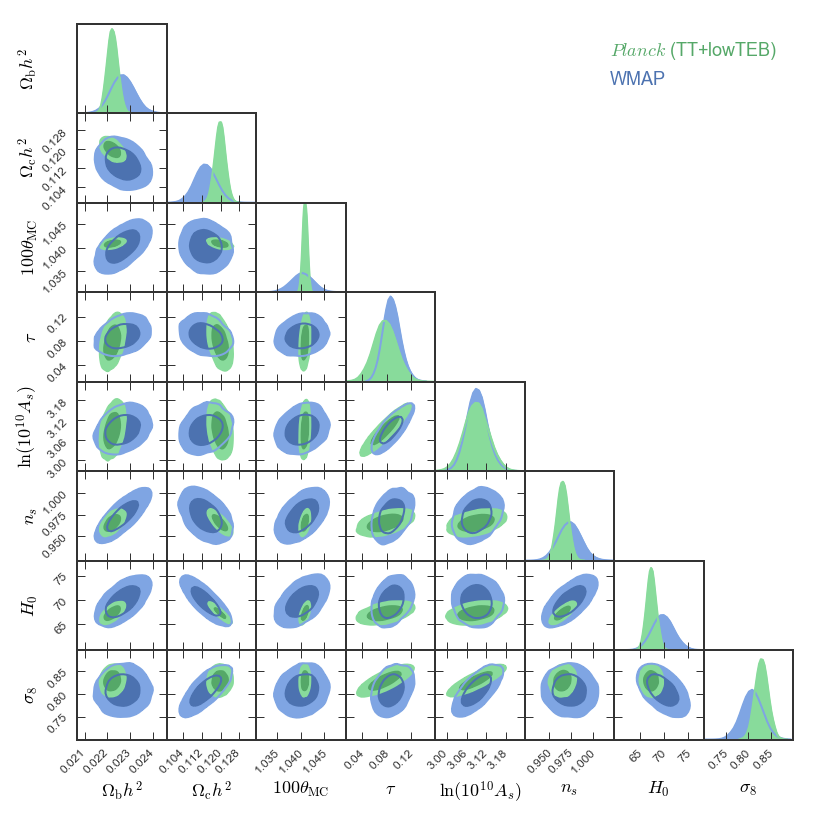

In [6]:
GTC = pygtc.plotGTC(chains=[Planckplot,WMAPplot],
                    weights=[Planckall[:,0],
                    WMAPall[:,0]],
                    paramNames=params,
                    chainLabels=chainLabels,
                    colorsOrder=('greens','blues'),
                    figureSize='APJ_page',
                    plotName='Planck-vs-WMAP.pdf')